# Cargando las librerias requeridas

In [373]:
# import sys
# !{sys.executable} -m pip install sklearn

import numpy as np
import pandas as pd
from plotnine import *

In [374]:
from sklearn import datasets
iris = datasets.load_iris() #Cargando el dataset de la flor de iris

tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


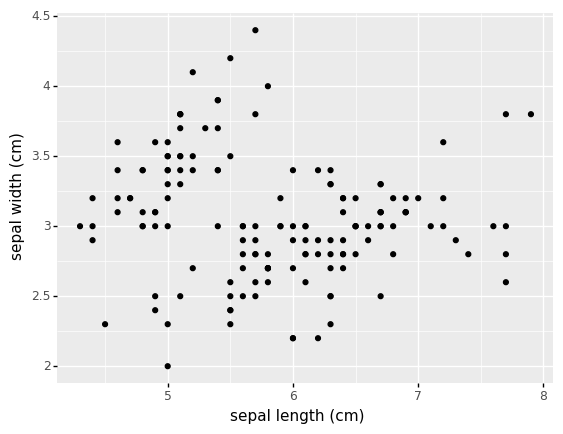

<ggplot: (323828240)>

In [375]:
ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)")+ geom_point()

#ggplot(tempDF)+aes(x="petal length (cm)", y="petal width (cm)") +geom_point()



In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33,random_state=42)



In [385]:
#Entrenando un modelo con todos los datos y prediciendo los valores
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN=KNN.fit(X_train,y_train)
prediccion=KNN.predict(X_test)
prediccion

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

# sklearn.metrics
El módulo metrics de sklearn contiene un gran número de métricas ya implementadas. La mayoría de estas funciones  solo necesitan las clases originales y predichas.

## accuracy_score(y_true, y_pred)
* y_true: Etiqueta reales
* y_pred: Etiqueta predichas por algún modelo

## precision_score(y_true, y_pred, pos_label=1, average='binary')
Consideraciones para clases binarias
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* average:<br> 
"binary": muestra la precisión considerando la clase de pos_label como verdadera.<br>
None: muestra la precisión considerando cada clase como verdadera.

## precision_score(y_true, y_pred, labels=None, average='binary')
Consideraciones para múltiples clases
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* labels: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* average:<br>
'binary': valor por default, produce error al tener múltiples clases.<br>
'micro': calcula una métrica global considerando en forma global los true positives (la suma total de True positive para cada clase), false negatives, y false positives.<br>
'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).<br>
'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).<br>
None: muestra la precisión considerando cada clase como verdadera.

In [386]:
#importando todas las métricas
from sklearn import metrics as mt


Veamos la matriz de confusión:

In [387]:
mt.confusion_matrix(y_test, prediccion)



array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

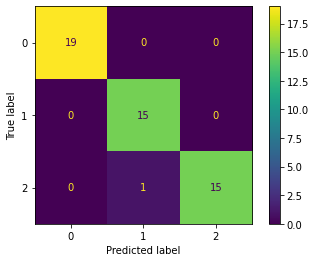

In [388]:
disp = mt.ConfusionMatrixDisplay(mt.confusion_matrix(y_test, prediccion))
disp.plot()

In [389]:
#Accuracy 
print("Accuracy del modelo:",mt.accuracy_score(y_test,prediccion))


Accuracy del modelo: 0.98


In [390]:
(19+15+15)/50

0.98

In [391]:
mt.precision_score(y_test==0,prediccion==0)

1.0

In [392]:
#Binarizo caso contrario da error
print("Precisión del modelo, para la clase 0 (binaria):",mt.precision_score(y_test==0,prediccion==0))
print("Precisión del modelo, para la clase 1 (binaria):",mt.precision_score(y_test==1,prediccion==1))
print("Precisión del modelo, para la clase 2 (binaria):",mt.precision_score(y_test==2,prediccion==2))


Precisión del modelo, para la clase 0 (binaria): 1.0
Precisión del modelo, para la clase 1 (binaria): 0.9375
Precisión del modelo, para la clase 2 (binaria): 1.0


In [393]:
print("Precisión del modelo, para cada clase:",mt.precision_score(y_test,prediccion,labels=[0,1,2],average=None))

Precisión del modelo, para cada clase: [1.     0.9375 1.    ]


In [394]:
19/19, 15/16, 15/15

(1.0, 0.9375, 1.0)

## recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary')
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* labels: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* average:<br>
'binary': valor por default, produce error al tener múltiples clases.<br>
'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.<br>
'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
None => muestra la precisión considerando cada clase como verdadera.

## f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary')
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* labels: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* average:<br>
'binary': valor por default, produce error al tener múltiples clases.<br>
'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.<br>
'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
None => muestra la precisión considerando cada clase como verdadera.

In [395]:
print("Precisión del modelo, para cada clase:",mt.precision_score(y_test,prediccion,labels=[0,1,2],average=None))
print("Recall del modelo para cada clase:",mt.recall_score(y_test,prediccion,labels=[0,1,2],average=None))


Precisión del modelo, para cada clase: [1.     0.9375 1.    ]
Recall del modelo para cada clase: [1.     1.     0.9375]


In [396]:
19/19, 15/15, 15/16

(1.0, 1.0, 0.9375)

In [397]:
print("F1-score del modelo para cada clase:",mt.f1_score(y_test,prediccion,labels=[0,1,2],average=None))

F1-score del modelo para cada clase: [1.         0.96774194 0.96774194]


In [398]:
print(mt.classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



**Nota**: ¿por qué separar train/test?  Probemos usando todos los datos y veamos como nos va (con un KNN con k=1)

In [399]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN=KNN.fit(iris.data,iris.target)
prediccion=KNN.predict(iris.data)

In [400]:
print(mt.classification_report(iris.target,prediccion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### **¿Qué pasó?**

Probemos con las lunas

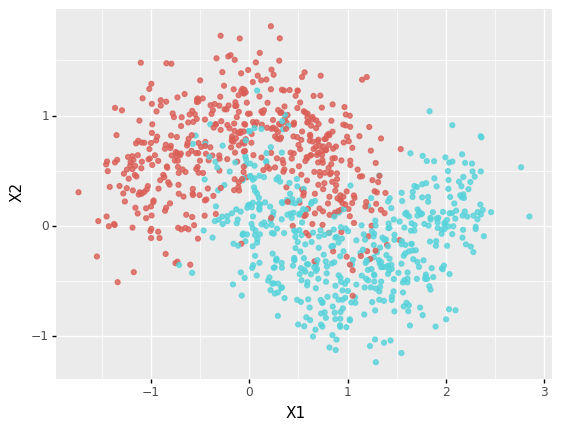

In [401]:
#Generando dos lunas
from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
tempDF=pd.DataFrame(tempData[0],columns=["X1","X2"])
tempDF['Labels']=tempData[1]
print(ggplot(tempDF)
 +aes(x="X1",y="X2",color="factor(Labels)")
 +geom_point(show_legend=False, alpha=0.8)
)

In [402]:
#Aplicando el modelo
KNN = KNeighborsClassifier(n_neighbors=10)
KNN=KNN.fit(tempData[0],tempData[1])


In [403]:
mt.confusion_matrix(tempData[1], KNN.predict(tempData[0]))

array([[464,  36],
       [ 56, 444]])

In [404]:
mt.accuracy_score(tempData[1], KNN.predict(tempData[0]))

0.908

In [405]:
mt.precision_score(tempData[1], KNN.predict(tempData[0]))

0.925

In [406]:
mt.recall_score(tempData[1], KNN.predict(tempData[0]))

0.888

In [407]:
mt.f1_score(tempData[1], KNN.predict(tempData[0]))

0.9061224489795918

In [408]:
print(mt.classification_report(tempData[1], KNN.predict(tempData[0])))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       500
           1       0.93      0.89      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



# Función train_test_split

La función train_test_split de sklearn.model_selection nos permite separar los datos en entrenamiento y test.<br>
train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)<br>
Parámetros
* *arrays: Arreglos con los datos a separar
* test_size: valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de test. Si no se define es el complemento de train_size.
* train_size: valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de entrenamiento. Si no se define es el complemento de test_size.
* random_state: valor entero, permite replicar un experimiento al setear la semilla de los números aleatorios.
* shuffle: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.
* stratify: Arreglo con etiquetas. En el caso que se entregue la separación mantiene la proporción de las etiquetas en cada muestra.


In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33, random_state=42)

In [410]:
#Creando un objeto KNN con las condiciones iniciales
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN=KNN.fit(X_train,y_train)

#Aplicando el modelo a otros datos
prediccion=KNN.predict(iris.data)
print("Accuracy del modelo, para cada clase:",mt.accuracy_score(iris.target,prediccion))
print("Precisión del modelo, para cada clase:",mt.precision_score(iris.target,prediccion,labels=[0,1,2],average=None))
print("Recall del modelo para cada clase:",mt.recall_score(iris.target,prediccion,labels=[0,1,2],average=None))
print("F1-score del modelo para cada clase:",mt.f1_score(iris.target,prediccion,labels=[0,1,2],average=None))

Accuracy del modelo, para cada clase: 0.9666666666666667
Precisión del modelo, para cada clase: [1.         0.94117647 0.95918367]
Recall del modelo para cada clase: [1.   0.96 0.94]
F1-score del modelo para cada clase: [1.         0.95049505 0.94949495]


# Curva de aprendizaje (reclasificación), sobre datos de IRIS

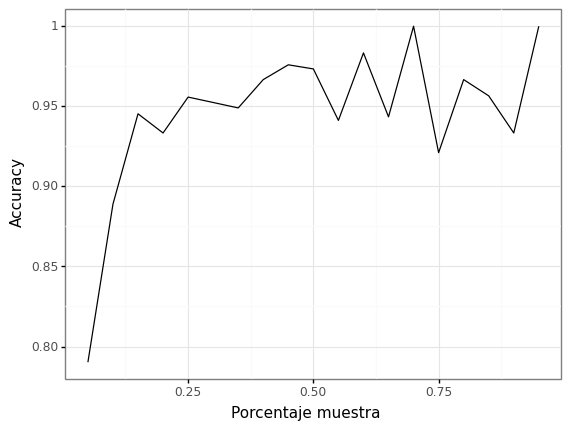

<ggplot: (324640217)>

In [418]:
#Visualizando comportamiento a medida que aumenta el tamaño de la muestra
#Repetir
allAcc = pd.DataFrame({'Acc': 0}, index=np.arange(0.05,1.0,0.05))
#Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    #Generando las distintas separaciones
    X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, train_size=i)
        
    #Entrenando y aplicando el modelo
    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN = KNN.fit(X_train,y_train)
    prediccion=KNN.predict(X_test)
        
    #Evaluando el modelo
    allAcc.loc[i]=mt.accuracy_score(y_test,prediccion)

#Gráfico de los valores
(ggplot(allAcc, aes(x=allAcc.index,y="Acc"))+
 geom_line()+
 labs(x="Porcentaje muestra",y="Accuracy")+
 theme_bw()
)

Separemos los datos en train (70%) y test (30%)

In [419]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, train_size=0.7)



Entrenamos el modelo con una fracción de los datos y evaluamos su accuracy en el set de test y train

In [420]:
#Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allAcc = pd.DataFrame(columns=['Tipo', 'pct','run','acc'])

numExp=20
#Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    #Iterando sobre el número de experimentos
    for j in range(numExp):
        #Generando las distintas separaciones
        X_train2, null, y_train2, null= train_test_split(X_train,y_train, train_size=i)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=1)
        KNN=KNN.fit(X_train2,y_train2)
                
        #Evaluando el modelo en set Train
        prediccion=KNN.predict(X_train)
        acc=mt.accuracy_score(y_train,prediccion)
        allAcc.loc[len(allAcc)] = ['train',i, j,acc]
        
        #Evaluando el modelo en set Test
        prediccion=KNN.predict(X_test)
        acc=mt.accuracy_score(y_test,prediccion)
        allAcc.loc[len(allAcc)] = ['test',i, j,acc]




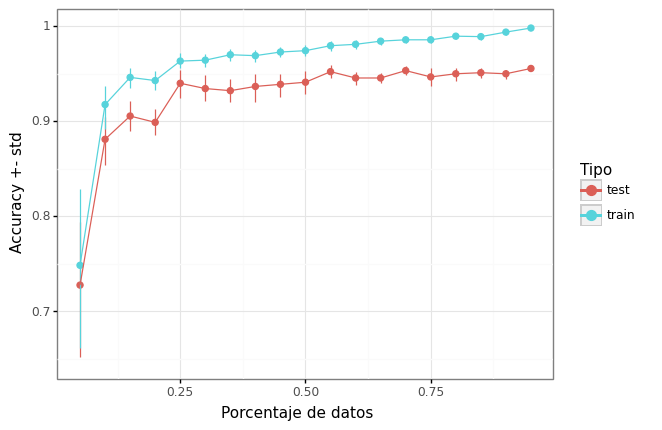

<ggplot: (324564384)>

In [421]:
ggplot(allAcc, aes(x='pct', y='acc', color='Tipo'))\
+ stat_summary() \
+ stat_summary(geom='line') \
+ labs(x="Porcentaje de datos",y="Accuracy +- std")\
+ theme_bw()


# k-fold cross-validation

El objeto KFold de sklearn.model_selection permite separar los datos en K-fold. A pesar de haber otras funciones que también permiten aplicar y evaluar k-fold cross validation en forma sencilla, esta separación/evaluación no se podría usar con otros modelos que no fueran de sklearn.<br><br>

La función no separa los datos, simplemente retorna los índices de cada fold, la separación se hace de forma posterior.<br>
KFold(n_splits=5, shuffle=False, random_state=None)<br>
Parámetros
* n_splits: número de folds a utilizar
* random_state: valor entero, permite replicar un experimento al setear la semilla de los números aleatorios.
* shuffle: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.<br><br>

Métodos
* split(X[, y, groups]): Genera los índices para separar los datos de entrenamiento y test.

In [422]:
data = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [423]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
print("Train: ", train, "Test:", test)

Train:  ['e' 'h' 'b' 'i' 'g' 'a' 'j' 'd'] Test: ['c' 'f']


In [424]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=0.2)
for train, test in rs.split(data):
    print("Train: ", data[train], "Test:", data[test])

Train:  ['d' 'j' 'h' 'c' 'b' 'g' 'f' 'e'] Test: ['i' 'a']
Train:  ['j' 'g' 'e' 'i' 'd' 'b' 'f' 'c'] Test: ['a' 'h']
Train:  ['f' 'g' 'a' 'i' 'b' 'c' 'd' 'j'] Test: ['e' 'h']
Train:  ['i' 'g' 'b' 'e' 'h' 'a' 'j' 'f'] Test: ['c' 'd']
Train:  ['d' 'b' 'j' 'g' 'a' 'i' 'c' 'f'] Test: ['h' 'e']
Train:  ['d' 'e' 'a' 'b' 'g' 'j' 'f' 'c'] Test: ['i' 'h']
Train:  ['c' 'e' 'i' 'd' 'h' 'f' 'g' 'a'] Test: ['b' 'j']
Train:  ['h' 'g' 'i' 'f' 'c' 'j' 'd' 'e'] Test: ['b' 'a']
Train:  ['g' 'f' 'i' 'b' 'h' 'c' 'j' 'e'] Test: ['a' 'd']
Train:  ['b' 'd' 'j' 'e' 'g' 'c' 'a' 'f'] Test: ['i' 'h']


In [425]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [426]:
for train, test in kf.split(data):
    print("Train: ", data[train], "Test:", data[test])

Train:  ['c' 'd' 'e' 'f' 'g' 'h' 'i' 'j'] Test: ['a' 'b']
Train:  ['a' 'b' 'e' 'f' 'g' 'h' 'i' 'j'] Test: ['c' 'd']
Train:  ['a' 'b' 'c' 'd' 'g' 'h' 'i' 'j'] Test: ['e' 'f']
Train:  ['a' 'b' 'c' 'd' 'e' 'f' 'i' 'j'] Test: ['g' 'h']
Train:  ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'] Test: ['i' 'j']


In [427]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=4)

In [428]:
for train, test in rkf.split(data):
    print("Train: ", data[train], "Test:", data[test])

Train:  ['a' 'b' 'c' 'd' 'e' 'g' 'h' 'i'] Test: ['f' 'j']
Train:  ['a' 'b' 'd' 'e' 'f' 'g' 'i' 'j'] Test: ['c' 'h']
Train:  ['a' 'c' 'd' 'e' 'f' 'h' 'i' 'j'] Test: ['b' 'g']
Train:  ['a' 'b' 'c' 'd' 'f' 'g' 'h' 'j'] Test: ['e' 'i']
Train:  ['b' 'c' 'e' 'f' 'g' 'h' 'i' 'j'] Test: ['a' 'd']
Train:  ['b' 'c' 'd' 'e' 'f' 'g' 'i' 'j'] Test: ['a' 'h']
Train:  ['a' 'd' 'e' 'f' 'g' 'h' 'i' 'j'] Test: ['b' 'c']
Train:  ['a' 'b' 'c' 'f' 'g' 'h' 'i' 'j'] Test: ['d' 'e']
Train:  ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'] Test: ['i' 'j']
Train:  ['a' 'b' 'c' 'd' 'e' 'h' 'i' 'j'] Test: ['f' 'g']
Train:  ['a' 'c' 'd' 'e' 'f' 'g' 'h' 'i'] Test: ['b' 'j']
Train:  ['a' 'b' 'c' 'd' 'e' 'g' 'i' 'j'] Test: ['f' 'h']
Train:  ['b' 'c' 'd' 'e' 'f' 'h' 'i' 'j'] Test: ['a' 'g']
Train:  ['a' 'b' 'c' 'd' 'f' 'g' 'h' 'j'] Test: ['e' 'i']
Train:  ['a' 'b' 'e' 'f' 'g' 'h' 'i' 'j'] Test: ['c' 'd']
Train:  ['a' 'b' 'c' 'd' 'f' 'g' 'i' 'j'] Test: ['e' 'h']
Train:  ['a' 'c' 'd' 'e' 'f' 'g' 'h' 'i'] Test: ['b' 'j']
Train:  ['a' '

En los datos de Iris:

In [429]:
#Creando el objeto con sus características 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
print(kf)

#Generando los k-fold
temp=kf.split(iris.data)
for train_index, test_index in temp:
    print("TRAIN:", train_index, "\nTEST:", test_index,"\n\n")

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [  0   1   2   3   5   6   7   8   9  11  12  13  14  15  16  17  19  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59
  60  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77  78
  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 131 132 133 135 136 137 139
 140 141 142 144 145 146 147 148 149] 
TEST: [  4  10  18  20  36  56  68  79  80  88 114 130 134 138 143] 


TRAIN: [  0   1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  35  36  37  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  64  65  66  67  68  69  70  72  73  74  75  76  77  78
  79  80  81  82  83 

In [430]:
#Analizando el error de un modelo
#Creando los objetos con sus características 
numFolds=10
kf = KFold(n_splits=numFolds)
KNN = KNeighborsClassifier(n_neighbors=10)

#Generando los k-fold
temp=kf.split(iris.data)

allAccTest=np.zeros((numFolds,1))
index=0
for train_index, test_index in temp:
    KNN=KNN.fit(iris.data[train_index,:],iris.target[train_index])
    prediccion=KNN.predict(iris.data[test_index,:])
    allAccTest[index]=mt.accuracy_score(iris.target[test_index],prediccion)
    index+=1
print("Accurancy: ",allAccTest.mean(),"+-",allAccTest.std())

Accurancy:  0.9333333333333333 +- 0.08432740427115679


Alternativamente, podemos usar `cross_validate`

In [434]:
from sklearn.model_selection import cross_validate
kf = KFold(n_splits=10)
KNN = KNeighborsClassifier(n_neighbors=10)
results = cross_validate(KNN, iris.data, iris.target, cv=kf)
print("Accurancy: ",results['test_score'].mean(),"+-",results['test_score'].std())

Accurancy:  0.9333333333333333 +- 0.08432740427115679


# Hiperparametros: Buscando el mejor valor de K

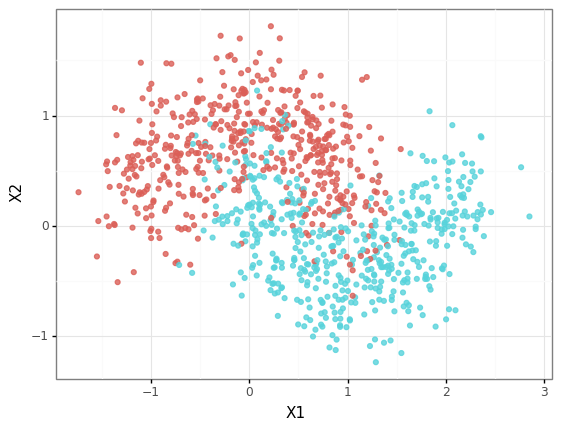

<ggplot: (323661858)>

In [435]:
#Generando dos lunas
from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
tempDF=pd.DataFrame(zip(tempData[0][:,0],tempData[0][:,1],tempData[1]),columns=["X1","X2","Label"])
(ggplot(tempDF)
 +aes(x="X1",y="X2",color="factor(Label)")
 +geom_point(show_legend=False, alpha=0.8)
 +theme_bw()
)

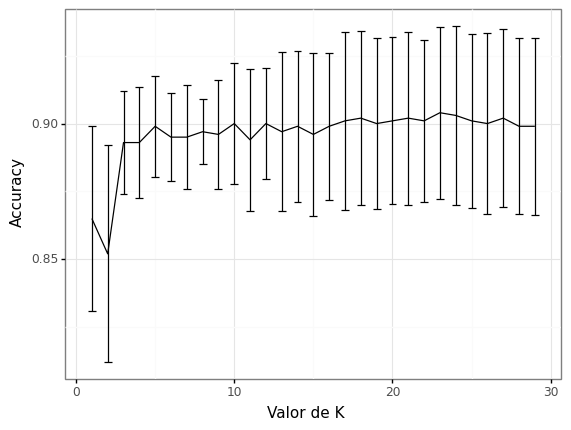

<ggplot: (324569974)>

In [436]:
#Analizando el error de un modelo
#Creando los objetos con sus características 
maxK=30
kf = KFold(n_splits=10)

tempDF=pd.DataFrame(columns=['K','meanTest','stdTest'])
    
for i in range(1,maxK):
    KNN = KNeighborsClassifier(n_neighbors=i)
    results = cross_validate(KNN, tempData[0], tempData[1], cv=kf)
    tempDF.loc[len(tempDF)] = [i, results['test_score'].mean(), results['test_score'].std()]

#Gráfico de los valores
(ggplot(tempDF)+aes(x="K",y="meanTest",ymin="meanTest-stdTest",ymax="meanTest+stdTest")+
 geom_line()+
 geom_errorbar()+ 
 labs(x="Valor de K",y="Accuracy")+
 theme_bw()
)



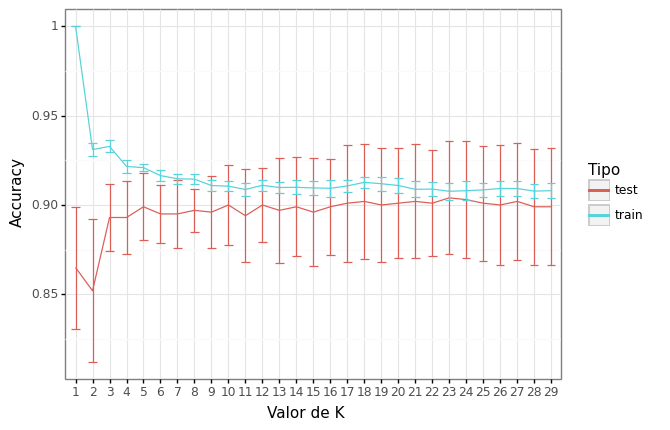

<ggplot: (324764492)>

In [437]:
#Analizando el error de un modelo
#Creando los objetos con sus características 
maxK=30
kf = KFold(n_splits=10)

tempDF=pd.DataFrame(columns=['Tipo','K','meanTest','stdTest'])
    
for i in range(1,maxK):
    KNN = KNeighborsClassifier(n_neighbors=i)
    results = cross_validate(KNN, tempData[0], tempData[1], cv=kf, return_train_score=True)
    tempDF.loc[len(tempDF)] = ['test',i, results['test_score'].mean(), results['test_score'].std()]
    tempDF.loc[len(tempDF)] = ['train',i, results['train_score'].mean(), results['train_score'].std()]

#Gráfico de los valores
(ggplot(tempDF)+
 aes(x="K",y="meanTest",ymin="meanTest-stdTest",ymax="meanTest+stdTest", group='Tipo',color='Tipo')+
 geom_line()+
 geom_errorbar()+ 
 labs(x="Valor de K",y="Accuracy")+
 theme_bw()
)




# Curva ROC

Para generar la curva ROC es necesario calcular el true y false positive rate para los distintos umbrales (`threshold`). Este proceso se realiza con la función roc_curve de la librería metrics<br>
roc_curve(y_true, y_score, pos_label=None)<br>
Parámetros
* y_true: etiqueta reales
* y_score: un score predicho por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).<br><br>

Retorna:
* fpr: Los valores de false positive rate para los threshold definidos por la función.
* tpr: Los valores de true positive rate para los threshold definidos por la función.
* thresholds: límites definidos por la función<br><br>

Otra función importante de metrics es auc(x, y), la cual calcula el área bajo la curva para los valores de x e y.<br>
auc(x, y)<br>
Parámetros
* x: Coordenadas del eje X debe ser monótonamente creciente o decreciente
* y: Coordenadas del eje Y

Límites [2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


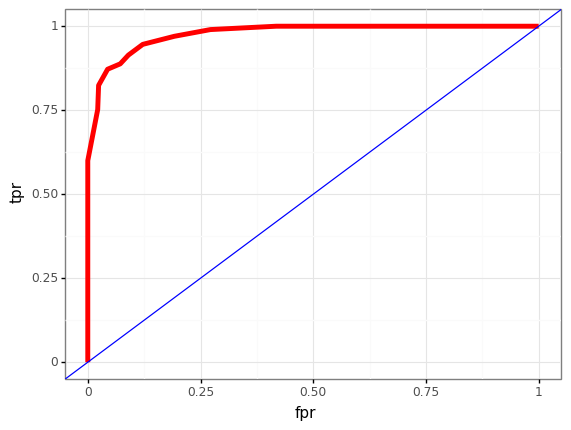


Valor del AUC: 0.9767560000000001


In [438]:
#Aplicando el modelo
KNN = KNeighborsClassifier(n_neighbors=10)
KNN=KNN.fit(tempData[0],tempData[1])
prediccionProb=KNN.predict_proba(tempData[0])

#Calculando los tpr and fpr
from sklearn import metrics as mt
fpr, tpr, thresholds = mt.roc_curve(tempData[1],prediccionProb[:,1])
print("Límites",thresholds)

tempDF=pd.DataFrame(zip(fpr,tpr),columns=["fpr","tpr"])
#Curva ROC
print(ggplot(tempDF)+aes(x="fpr",y="tpr")+geom_line(color="red",size=2)+
    geom_abline(color='blue') +
    theme_bw() 
)

#Valor del AUC
print("Valor del AUC:",mt.auc(fpr,tpr))

# Buscando el mejor límite
El mejor límite posible está dado por un alto tpr y un bajo fpr. Podemos buscar este valor a través del g-means, Youden’s J statistic, o simplemente en forma visual, a través de un gráfico de los tpr y 1-fpr en un mismo gráfico y ver donde se intersectan.

In [439]:
#gmeans
gmeans = np.sqrt(tpr * (1-fpr))
ix= np.argmax(gmeans)
print("El mejor threshold según g-means es ",thresholds[ix])

J = tpr-fpr
ix= np.argmax(J)
print("El mejor threshold según Youden es ",thresholds[ix])

El mejor threshold según g-means es  0.7
El mejor threshold según Youden es  0.7


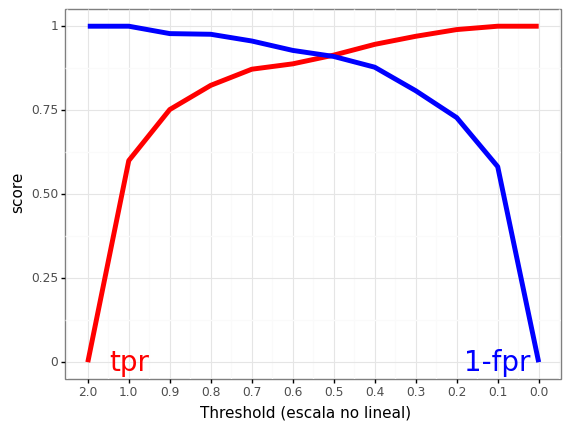

<ggplot: (324949863)>

In [440]:
fpr, tpr, thresholds = mt.roc_curve(tempData[1],prediccionProb[:,1])
tempDF=pd.DataFrame(zip(fpr,tpr),columns=["fpr","tpr"])
(ggplot(tempDF)+aes(x=range(len(thresholds)))+
 theme_bw()+
 geom_line(aes(y=tpr),color="red",size=2)+
 geom_line(aes(y=1-fpr),color="blue",size=2)+
 annotate("text",label="tpr",x=1,y=0,color="red",size=20)+
 annotate("text",label="1-fpr",x=len(thresholds)-2,y=0,color="blue",size=20)+
 scale_x_continuous(labels=thresholds,breaks=range(len(thresholds)))+
 labs(x="Threshold (escala no lineal)",y="score")
)
